In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df1 = pd.read_excel('/home/weijia/kitbigdata/Lesson5/Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls',sheet_name='Spécialistes',na_values='nc')
df2 = pd.read_excel('/home/weijia/kitbigdata/Lesson5/estim-pop-dep-sexe-aq-1975-2018.xls',sheet_name='2016',skiprows=4)

In [53]:
df1["DEPARTEMENT_NUM"]=df1.DEPARTEMENT.str[:2]
df1["SPE_NUM"]=df1["Spécialistes"].str[:2]
df1["Spe5"]=df1["Spécialistes"].str[:5]
df1 = df1[df1['Spe5'].map(str) != 'TOTAL']
df1 = df1.drop(columns='Spe5')
df1

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),DEPARTEMENT_NUM,SPE_NUM
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4530079.33,2496180.45,0.00,7026259.78,01,02
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4985259.62,373837.57,0.00,5359097.19,02,02
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5102901.70,560978.59,0.00,5663880.29,03,02
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,NaN,NaN,NaN,NaN,04,02
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,5,NaN,NaN,NaN,NaN,05,02
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,24853773.21,10816346.67,0.00,35670119.88,06,02
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5271245.30,802542.01,0.00,6073787.31,07,02
7,02- Anesthésie-réanimation chirurgicale,08- Ardennes,6,NaN,NaN,NaN,NaN,08,02
8,02- Anesthésie-réanimation chirurgicale,09- Ariège,0,0.00,0.00,0.00,0.00,09,02
9,02- Anesthésie-réanimation chirurgicale,10- Aube,12,3693624.78,9543.92,0.00,3703168.70,10,02


In [54]:
df1_new = df1.loc[:,['Spécialistes', 'DEPARTEMENT_NUM', 'EFFECTIFS','DEPASSEMENTS (Euros)','SPE_NUM']]
df1_new

,Spécialistes,DEPARTEMENT_NUM,EFFECTIFS,DEPASSEMENTS (Euros),SPE_NUM
0,02- Anesthésie-réanimation chirurgicale,01,17,2496180.45,02
1,02- Anesthésie-réanimation chirurgicale,02,19,373837.57,02
2,02- Anesthésie-réanimation chirurgicale,03,19,560978.59,02
3,02- Anesthésie-réanimation chirurgicale,04,4,NaN,02
4,02- Anesthésie-réanimation chirurgicale,05,5,NaN,02
5,02- Anesthésie-réanimation chirurgicale,06,110,10816346.67,02
6,02- Anesthésie-réanimation chirurgicale,07,23,802542.01,02
7,02- Anesthésie-réanimation chirurgicale,08,6,NaN,02
8,02- Anesthésie-réanimation chirurgicale,09,0,0.00,02
9,02- Anesthésie-réanimation chirurgicale,10,12,9543.92,02


In [55]:
df2_new = df2.iloc[:,[0,64]]
df2_new.columns = ['DEPARTEMENT','POPULATION']
#df2_new = df2_new[df2_new['DEPARTEMENT'].map() <= 2]
df2_new

,DEPARTEMENT,POPULATION
0,01,323099.0
1,02,276021.0
2,03,177390.0
3,04,83030.0
4,05,72116.0
5,06,568999.0
6,07,166905.0
7,08,141398.0
8,09,77950.0
9,10,159558.0


In [56]:
dfm = pd.merge(df1_new, df2_new, how='right', left_on='DEPARTEMENT_NUM', right_on='DEPARTEMENT')
dfm

,Spécialistes,DEPARTEMENT_NUM,EFFECTIFS,DEPASSEMENTS (Euros),SPE_NUM,DEPARTEMENT,POPULATION
0,02- Anesthésie-réanimation chirurgicale,01,17.0,2496180.45,02,01,323099.0
1,20- Réanimation médicale,01,0.0,0.00,20,01,323099.0
2,03- Pathologie cardio-vasculaire,01,20.0,252877.05,03,01,323099.0
3,43- Chirurgie infantile,01,0.0,0.00,43,01,323099.0
4,44- Chirurgie maxillo-faciale,01,0.0,0.00,44,01,323099.0
5,46- Chirurgie plastique reconstructrice et est...,01,1.0,NaN,46,01,323099.0
6,47- Chirurgie thoracique et cardio-vasculaire,01,0.0,0.00,47,01,323099.0
7,48- Chirurgie vasculaire,01,2.0,NaN,48,01,323099.0
8,49- Chirurgie viscérale et digestive,01,3.0,NaN,49,01,323099.0
9,04- Chirurgie générale,01,7.0,NaN,04,01,323099.0


In [81]:
# Par département

#dfm_d01 = dfm[dfm['DEPARTEMENT'].map(str) == '92']
dfm_d01 = dfm.groupby(['DEPARTEMENT'])['EFFECTIFS','POPULATION','DEPASSEMENTS (Euros)'].sum()
dfm_d01 = dfm_d01.dropna()
dfm_d01 = dfm_d01[round(dfm_d01['EFFECTIFS']).map(int) != 0]
dfm_d01['density'] = dfm_d01['POPULATION']/(dfm_d01['EFFECTIFS'])
dfm_d01

,EFFECTIFS,POPULATION,DEPASSEMENTS (Euros),density
DEPARTEMENT,,,,
01,243.0,13893257.0,1.072049e+07,57173.897119
02,291.0,11868903.0,4.501532e+06,40786.608247
03,224.0,7627770.0,4.082130e+06,34052.544643
04,105.0,3570290.0,1.715470e+03,34002.761905
05,110.0,3100988.0,2.217779e+05,28190.800000
06,1636.0,24466957.0,8.512230e+07,14955.352689
07,186.0,7176915.0,6.572868e+06,38585.564516
08,123.0,6080114.0,7.800942e+05,49431.821138
09,66.0,3351850.0,0.000000e+00,50785.606061


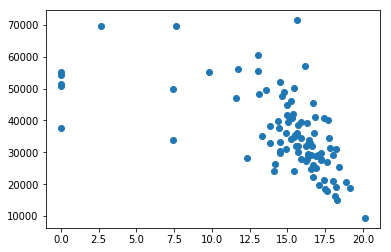

In [86]:
plt.scatter(np.log(dfm_d01['DEPASSEMENTS (Euros)']+1) ,dfm_d01['density'])

In [99]:
df2_new2 = df2
df2_new2['age_0_4']=df2_new2.iloc[:,2]/df2_new2.iloc[:,64]
df2_new2['age_5_9']=df2_new2.iloc[:,3]/df2_new2.iloc[:,64]
df2_new2['age_10_14']=df2_new2.iloc[:,4]/df2_new2.iloc[:,64]
df2_new2['age_15_19']=df2_new2.iloc[:,5]/df2_new2.iloc[:,64]
df2_new2['age_20_24']=df2_new2.iloc[:,6]/df2_new2.iloc[:,64]
df2_new2

,Unnamed: 0,Unnamed: 1,0 à 4 ans,5 à 9 ans,10 à 14 ans,15 à 19 ans,20 à 24 ans,25 à 29 ans,30 à 34 ans,35 à 39 ans,...,80 à 84 ans.2,85 à 89 ans.2,90 à 94 ans.2,95 ans et plus.2,Total.2,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24
0,01,Ain,39758.0,44566.0,43975.0,38722.0,29573.0,35715.0,40599.0,42081.0,...,9138.0,6776.0,3625.0,889.0,323099.0,0.123052,0.137933,0.136104,0.119846,0.091529
1,02,Aisne,32675.0,35227.0,35718.0,33264.0,25933.0,29856.0,31343.0,30998.0,...,9833.0,6966.0,3441.0,618.0,276021.0,0.118379,0.127624,0.129403,0.120513,0.093953
2,03,Allier,15882.0,18048.0,19039.0,18217.0,14895.0,15488.0,16997.0,17341.0,...,8677.0,6461.0,3244.0,806.0,177390.0,0.089532,0.101742,0.107328,0.102695,0.083968
3,04,Alpes-de-Haute-Provence,7815.0,8764.0,9523.0,8710.0,6265.0,7178.0,8285.0,8463.0,...,3416.0,2596.0,1436.0,350.0,83030.0,0.094123,0.105552,0.114693,0.104902,0.075455
4,05,Hautes-Alpes,7177.0,8234.0,8547.0,7493.0,5880.0,6762.0,7819.0,8254.0,...,2740.0,2011.0,1186.0,342.0,72116.0,0.099520,0.114177,0.118517,0.103902,0.081535
5,06,Alpes-Maritimes,56081.0,58443.0,56820.0,59425.0,56020.0,58926.0,62485.0,65025.0,...,23458.0,18459.0,10121.0,2914.0,568999.0,0.098561,0.102712,0.099860,0.104438,0.098454
6,07,Ardèche,16808.0,19000.0,20275.0,17236.0,13045.0,14974.0,16907.0,18039.0,...,6411.0,5085.0,2871.0,679.0,166905.0,0.100704,0.113837,0.121476,0.103268,0.078158
7,08,Ardennes,15177.0,17196.0,17632.0,15890.0,13073.0,14990.0,15818.0,15559.0,...,5408.0,3794.0,1791.0,390.0,141398.0,0.107335,0.121614,0.124698,0.112378,0.092455
8,09,Ariège,7247.0,8469.0,8616.0,7698.0,6009.0,7088.0,7643.0,8431.0,...,3518.0,2762.0,1454.0,375.0,77950.0,0.092970,0.108647,0.110532,0.098756,0.077088
9,10,Aube,17650.0,19848.0,19185.0,18641.0,16736.0,17405.0,18032.0,17846.0,...,5943.0,4362.0,2340.0,620.0,159558.0,0.110618,0.124394,0.120238,0.116829,0.104890


In [106]:
df2_new2_racour = df2_new2.iloc[:,[0,65,66,67,68,69]]
dfm2 = pd.merge(dfm, df2_new2_racour, how='inner', left_on='DEPARTEMENT_NUM', right_on='Unnamed: 0')
dfm2

,Spécialistes,DEPARTEMENT_NUM,EFFECTIFS,DEPASSEMENTS (Euros),SPE_NUM,DEPARTEMENT,POPULATION,Unnamed: 0,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24
0,02- Anesthésie-réanimation chirurgicale,01,17.0,2496180.45,02,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529
1,20- Réanimation médicale,01,0.0,0.00,20,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529
2,03- Pathologie cardio-vasculaire,01,20.0,252877.05,03,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529
3,43- Chirurgie infantile,01,0.0,0.00,43,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529
4,44- Chirurgie maxillo-faciale,01,0.0,0.00,44,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529
5,46- Chirurgie plastique reconstructrice et est...,01,1.0,NaN,46,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529
6,47- Chirurgie thoracique et cardio-vasculaire,01,0.0,0.00,47,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529
7,48- Chirurgie vasculaire,01,2.0,NaN,48,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529
8,49- Chirurgie viscérale et digestive,01,3.0,NaN,49,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529
9,04- Chirurgie générale,01,7.0,NaN,04,01,323099.0,01,0.123052,0.137933,0.136104,0.119846,0.091529


In [109]:
dfm_d02 = dfm2.groupby(['Spécialistes'])['EFFECTIFS','POPULATION','age_0_4','age_5_9','age_10_14'].sum()
dfm_d02 = dfm_d02.dropna()
dfm_d02 = dfm_d02[round(dfm_d02['EFFECTIFS']).map(int) != 0]
dfm_d02['density'] = dfm_d02['POPULATION']/(dfm_d02['EFFECTIFS'])
dfm_d02

,EFFECTIFS,POPULATION,age_0_4,age_5_9,age_10_14,density
Spécialistes,,,,,,
02- Anesthésie-réanimation chirurgicale,3558.0,33284904.0,10.203607,11.234429,11.338979,9.354948e+03
03- Pathologie cardio-vasculaire,4549.0,33284904.0,10.203607,11.234429,11.338979,7.316972e+03
04- Chirurgie générale,1255.0,33284904.0,10.203607,11.234429,11.338979,2.652184e+04
05- Dermato-vénéréologie,2972.0,33284904.0,10.203607,11.234429,11.338979,1.119950e+04
06- Radiodiagnostic et imagerie médicale,5274.0,33284904.0,10.203607,11.234429,11.338979,6.311131e+03
07- Gynécologie obstétrique,3411.0,33284904.0,10.203607,11.234429,11.338979,9.758107e+03
08- Gastro-entérologie et hépatologie,2050.0,33284904.0,10.203607,11.234429,11.338979,1.623654e+04
09- Médecine interne,284.0,33284904.0,10.203607,11.234429,11.338979,1.172004e+05
10- Neurochirurgie,210.0,33284904.0,10.203607,11.234429,11.338979,1.584995e+05
